# Optimizing Delivery Operations: A Data-Driven Analysis for FastTrack Logistics

## Project Overview
As a Data Analyst at FastTrack Logistics, your mission is to improve delivery performance, reduce delays, and identify cost-saving opportunities using data-driven insights. This notebook guides you through the end-to-end workflow: data collection, cleaning, analysis, visualization, and actionable recommendations.

### Workflow Outline
1. Data Collection
2. Data Cleaning & Preparation
3. Feature Engineering
4. Exploratory Data Analysis (EDA)
5. Visualization & Reporting
6. Business Intelligence & Insights
7. Automation (Optional Bonus)

---

## 1. Data Collection
We will simulate a realistic logistics dataset with columns such as:
- Order_ID, Customer_ID, Delivery_Date, Scheduled_Delivery, Distance_km
- Delivery_Status (On Time, Delayed), Region, Courier_Name, Fuel_Cost, Time_Taken_hr

You can replace this synthetic data with real CSV/database data as needed.

In [1]:
# Simulate Synthetic Logistics Dataset
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(42)
num_orders = 1000
regions = ['North', 'South', 'East', 'West']
couriers = ['CourierA', 'CourierB', 'CourierC', 'CourierD']

order_ids = [f'ORD{10000+i}' for i in range(num_orders)]
customer_ids = [f'CUST{2000+i}' for i in range(num_orders)]
base_date = datetime(2025, 6, 1)
delivery_dates = [base_date + timedelta(days=np.random.randint(0, 30)) for _ in range(num_orders)]
scheduled_dates = [d - timedelta(hours=np.random.randint(0, 5)) for d in delivery_dates]
distances = np.random.uniform(5, 500, num_orders).round(2)
delivery_status = np.random.choice(['On Time', 'Delayed'], num_orders, p=[0.85, 0.15])
regions_sample = np.random.choice(regions, num_orders)
courier_sample = np.random.choice(couriers, num_orders)
fuel_costs = (distances * np.random.uniform(0.5, 1.5, num_orders)).round(2)
time_taken = distances / np.random.uniform(30, 80, num_orders)
time_taken = time_taken.round(2)

# Assemble DataFrame
data = pd.DataFrame({
    'Order_ID': order_ids,
    'Customer_ID': customer_ids,
    'Delivery_Date': delivery_dates,
    'Scheduled_Delivery': scheduled_dates,
    'Distance_km': distances,
    'Delivery_Status': delivery_status,
    'Region': regions_sample,
    'Courier_Name': courier_sample,
    'Fuel_Cost': fuel_costs,
    'Time_Taken_hr': time_taken
})

data.head()

,Order_ID,Customer_ID,Delivery_Date,Scheduled_Delivery,Distance_km,Delivery_Status,Region,Courier_Name,Fuel_Cost,Time_Taken_hr
0,ORD10000,CUST2000,2025-06-07,2025-06-07 00:00:00,103.77,On Time,North,CourierC,114.09,2.22
1,ORD10001,CUST2001,2025-06-20,2025-06-19 20:00:00,341.71,On Time,West,CourierD,479.22,5.84
2,ORD10002,CUST2002,2025-06-29,2025-06-29 00:00:00,40.74,On Time,East,CourierB,35.98,0.54
3,ORD10003,CUST2003,2025-06-15,2025-06-15 00:00:00,20.17,On Time,East,CourierA,14.45,0.67
4,ORD10004,CUST2004,2025-06-11,2025-06-10 22:00:00,132.55,On Time,East,CourierB,124.94,1.88


## 2. Data Cleaning & Preparation

In this section, we will:
- Check for missing values and duplicates
- Convert columns to appropriate data types
- Handle any data quality issues

This ensures our dataset is ready for analysis and feature engineering.

In [2]:
# Data Cleaning & Preparation
# Check for missing values
missing_summary = data.isnull().sum()
print('Missing values per column:')
print(missing_summary)

# Check for duplicates
duplicate_count = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

# Remove duplicates if any
data = data.drop_duplicates()

# Convert date columns to datetime
data['Delivery_Date'] = pd.to_datetime(data['Delivery_Date'])
data['Scheduled_Delivery'] = pd.to_datetime(data['Scheduled_Delivery'])

# Ensure numeric columns are correct type
numeric_cols = ['Distance_km', 'Fuel_Cost', 'Time_Taken_hr']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric)

# Preview cleaned data
data.info()
data.head()

Missing values per column:
Order_ID              0
Customer_ID           0
Delivery_Date         0
Scheduled_Delivery    0
Distance_km           0
Delivery_Status       0
Region                0
Courier_Name          0
Fuel_Cost             0
Time_Taken_hr         0
dtype: int64
Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order_ID            1000 non-null   object        
 1   Customer_ID         1000 non-null   object        
 2   Delivery_Date       1000 non-null   datetime64[ns]
 3   Scheduled_Delivery  1000 non-null   datetime64[ns]
 4   Distance_km         1000 non-null   float64       
 5   Delivery_Status     1000 non-null   object        
 6   Region              1000 non-null   object        
 7   Courier_Name        1000 non-null   object        
 8   Fuel_Cost           1

,Order_ID,Customer_ID,Delivery_Date,Scheduled_Delivery,Distance_km,Delivery_Status,Region,Courier_Name,Fuel_Cost,Time_Taken_hr
0,ORD10000,CUST2000,2025-06-07,2025-06-07 00:00:00,103.77,On Time,North,CourierC,114.09,2.22
1,ORD10001,CUST2001,2025-06-20,2025-06-19 20:00:00,341.71,On Time,West,CourierD,479.22,5.84
2,ORD10002,CUST2002,2025-06-29,2025-06-29 00:00:00,40.74,On Time,East,CourierB,35.98,0.54
3,ORD10003,CUST2003,2025-06-15,2025-06-15 00:00:00,20.17,On Time,East,CourierA,14.45,0.67
4,ORD10004,CUST2004,2025-06-11,2025-06-10 22:00:00,132.55,On Time,East,CourierB,124.94,1.88


## 3. Feature Engineering

In this section, we will create new features to enhance our analysis:
- `Delivery_Delay` (hours): Difference between actual and scheduled delivery times
- `Cost_per_km`: Fuel cost per kilometer
- Additional metrics to support further analysis

In [3]:
# Feature Engineering
# Calculate Delivery_Delay (hours)
data['Delivery_Delay_hr'] = (data['Delivery_Date'] - data['Scheduled_Delivery']).dt.total_seconds() / 3600

# Calculate Cost_per_km
# Avoid division by zero
data['Cost_per_km'] = data['Fuel_Cost'] / data['Distance_km'].replace(0, np.nan)

# Preview new features
data[['Order_ID', 'Delivery_Date', 'Scheduled_Delivery', 'Delivery_Delay_hr', 'Cost_per_km']].head()

,Order_ID,Delivery_Date,Scheduled_Delivery,Delivery_Delay_hr,Cost_per_km
0,ORD10000,2025-06-07,2025-06-07 00:00:00,0.0,1.099451
1,ORD10001,2025-06-20,2025-06-19 20:00:00,4.0,1.402417
2,ORD10002,2025-06-29,2025-06-29 00:00:00,0.0,0.883162
3,ORD10003,2025-06-15,2025-06-15 00:00:00,0.0,0.716411
4,ORD10004,2025-06-11,2025-06-10 22:00:00,2.0,0.942588


## 4. Exploratory Data Analysis (EDA)

In this section, we will:
- Analyze delivery trends by region, courier, and time
- Identify patterns in delivery delays and fuel usage
- Calculate key metrics: average delivery time, % on-time deliveries, cost per order

In [4]:
# Exploratory Data Analysis (EDA)
# Delivery trends by region
region_summary = data.groupby('Region').agg({
    'Order_ID': 'count',
    'Delivery_Delay_hr': 'mean',
    'Fuel_Cost': 'sum',
    'Cost_per_km': 'mean'
}).rename(columns={'Order_ID': 'Total_Orders'})
print('Region-wise summary:')
print(region_summary)

# Courier performance
courier_summary = data.groupby('Courier_Name').agg({
    'Order_ID': 'count',
    'Delivery_Delay_hr': 'mean',
    'Fuel_Cost': 'sum',
    'Cost_per_km': 'mean'
}).rename(columns={'Order_ID': 'Total_Orders'})
print('\nCourier-wise summary:')
print(courier_summary)

# Delivery status breakdown
status_counts = data['Delivery_Status'].value_counts(normalize=True) * 100
print('\nDelivery Status (%):')
print(status_counts)

# Average delivery time
avg_time = data['Time_Taken_hr'].mean()
print(f'\nAverage Delivery Time (hr): {avg_time:.2f}')

# Cost per order
cost_per_order = data['Fuel_Cost'].sum() / data.shape[0]
print(f'Average Fuel Cost per Order: {cost_per_order:.2f}')

Region-wise summary:
        Total_Orders  Delivery_Delay_hr  Fuel_Cost  Cost_per_km
Region                                                         
East             254           1.901575   64509.94     0.976647
North            236           2.055085   57015.29     0.999124
South            244           2.008197   61752.42     1.013197
West             266           1.883459   68432.33     0.988857

Courier-wise summary:
              Total_Orders  Delivery_Delay_hr  Fuel_Cost  Cost_per_km
Courier_Name                                                         
CourierA               225           1.884444   54646.49     0.983056
CourierB               259           1.969112   67913.05     1.019714
CourierC               257           1.949416   65961.75     0.986322
CourierD               259           2.023166   63188.69     0.985867

Delivery Status (%):
Delivery_Status
On Time    86.1
Delayed    13.9
Name: proportion, dtype: float64

Average Delivery Time (hr): 4.96
Average Fuel Co

## 5. Visualization & Reporting

In this section, we will visualize key metrics and trends:
- KPIs: On-Time %, Avg Delivery Time, Total Cost
- Region-wise delivery performance
- Delay trends over time
- Courier performance comparison

You can use these visualizations as a basis for Power BI or Tableau dashboards.

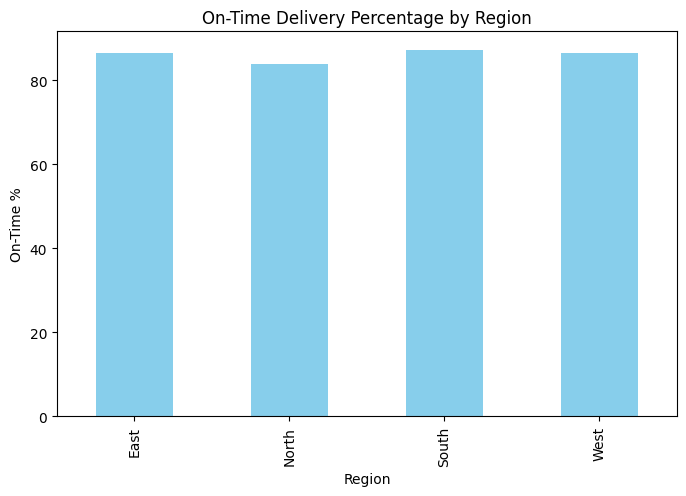

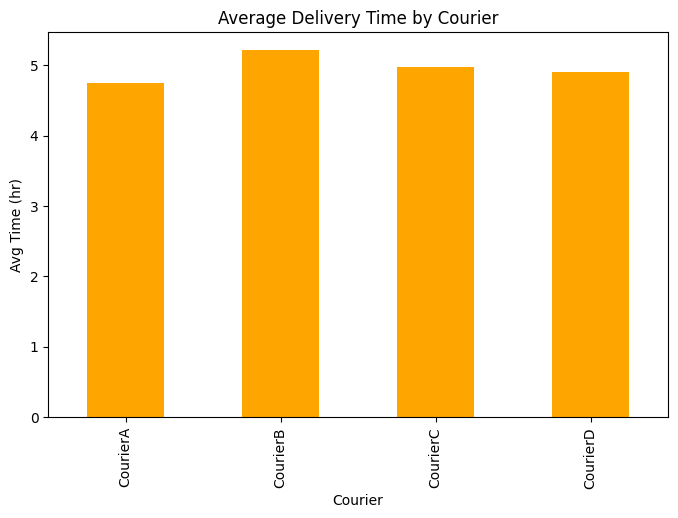

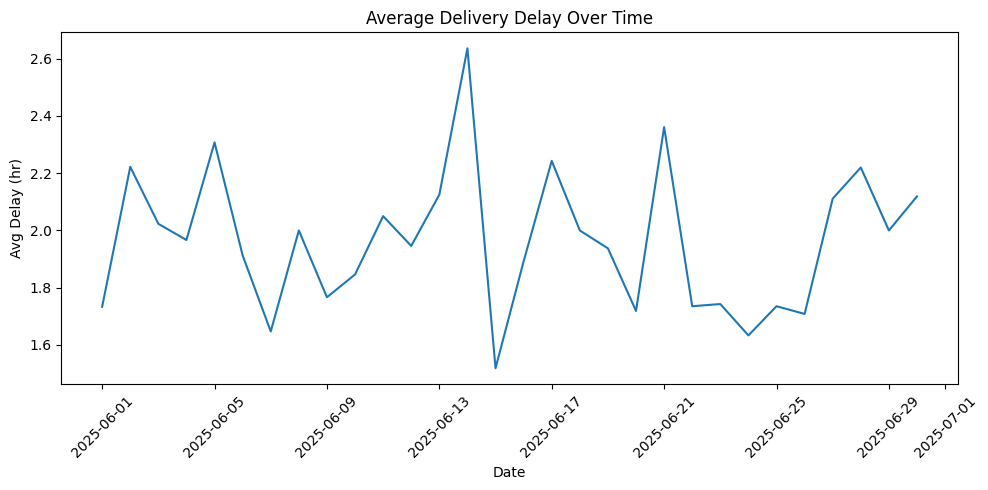

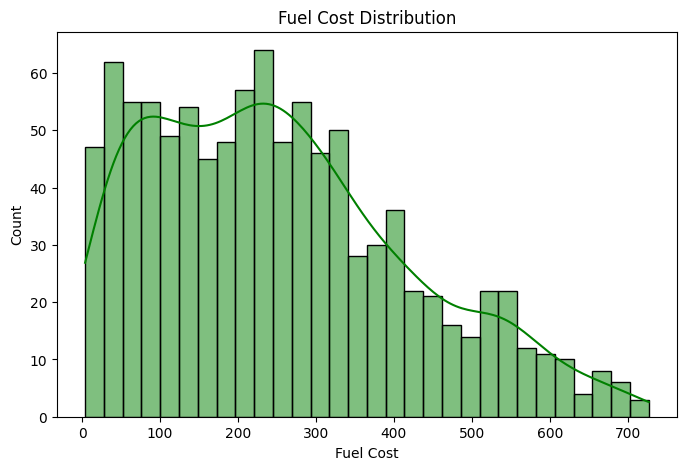

In [5]:
# Visualization & Reporting
import matplotlib.pyplot as plt
import seaborn as sns

# On-Time Delivery Percentage by Region
plt.figure(figsize=(8,5))
region_ontime = data.groupby('Region')['Delivery_Status'].apply(lambda x: (x=='On Time').mean()*100)
region_ontime.plot(kind='bar', color='skyblue')
plt.title('On-Time Delivery Percentage by Region')
plt.ylabel('On-Time %')
plt.xlabel('Region')
plt.show()

# Average Delivery Time by Courier
plt.figure(figsize=(8,5))
courier_avg_time = data.groupby('Courier_Name')['Time_Taken_hr'].mean()
courier_avg_time.plot(kind='bar', color='orange')
plt.title('Average Delivery Time by Courier')
plt.ylabel('Avg Time (hr)')
plt.xlabel('Courier')
plt.show()

# Delivery Delays Over Time
plt.figure(figsize=(10,5))
delay_trend = data.groupby(data['Delivery_Date'].dt.date)['Delivery_Delay_hr'].mean()
delay_trend.plot()
plt.title('Average Delivery Delay Over Time')
plt.ylabel('Avg Delay (hr)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Fuel Cost Distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Fuel_Cost'], bins=30, kde=True, color='green')
plt.title('Fuel Cost Distribution')
plt.xlabel('Fuel Cost')
plt.show()

## 6. Business Intelligence & Insights

In this section, we will:
- Identify top factors contributing to delivery delays
- Recommend operational changes (e.g., re-routing, courier reassignment)
- Highlight potential savings (e.g., fuel cost optimization, route shortening)

These insights will inform strategic decisions for FastTrack Logistics.

In [6]:
# Business Intelligence & Insights
# Identify top factors contributing to delivery delays
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Regression analysis: What affects Delivery_Delay_hr?
model = ols('Delivery_Delay_hr ~ Distance_km + Fuel_Cost + Time_Taken_hr + C(Region) + C(Courier_Name)', data=data).fit()
print(model.summary())

# Group by region and courier to find highest average delays
delay_by_region = data.groupby('Region')['Delivery_Delay_hr'].mean().sort_values(ascending=False)
delay_by_courier = data.groupby('Courier_Name')['Delivery_Delay_hr'].mean().sort_values(ascending=False)
print('\nAverage Delivery Delay by Region:')
print(delay_by_region)
print('\nAverage Delivery Delay by Courier:')
print(delay_by_courier)

# Recommendations (as comments)
print("\nRecommendations:")
print("- Reassign deliveries from couriers with high average delays to better performers.")
print("- Optimize routes in regions with high delays.")
print("- Investigate fuel cost outliers for potential savings.")

                            OLS Regression Results                            
Dep. Variable:      Delivery_Delay_hr   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7362
Date:                Tue, 22 Jul 2025   Prob (F-statistic):              0.676
Time:                        08:57:15   Log-Likelihood:                -1764.0
No. Observations:                1000   AIC:                             3548.
Df Residuals:                     990   BIC:                             3597.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## 7. Automation

In this section, we will:
- Automate weekly data updates and summary report generation using Python
- Export a summary report (CSV or email)

This helps streamline reporting and keeps stakeholders informed.

In [7]:
# Automation: Weekly Summary Report
import schedule
import time
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

# Function to generate and export weekly summary
def export_weekly_summary():
    summary = data.groupby('Region').agg({
        'Order_ID': 'count',
        'Delivery_Delay_hr': 'mean',
        'Fuel_Cost': 'sum',
        'Cost_per_km': 'mean'
    }).rename(columns={'Order_ID': 'Total_Orders'})
    summary.to_csv('weekly_logistics_summary.csv')
    print('Weekly summary exported to CSV.')
    # Optional: Send email (configure SMTP settings as needed)
    # send_email_report('weekly_logistics_summary.csv')

# Example: Schedule every Monday at 8am
# schedule.every().monday.at("08:00").do(export_weekly_summary)

# Uncomment below to run the scheduler (for demonstration only)
# while True:
#     schedule.run_pending()
#     time.sleep(60)

# Email sending function
def send_email_report(filename):
    sender = 'your_email@example.com'
    receiver = 'recipient@example.com'
    subject = 'Weekly Logistics Summary Report'
    body = 'Please find attached the latest weekly logistics summary.'
    msg = MIMEMultipart()
    msg['From'] = sender
    msg['To'] = receiver
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))
    with open(filename, 'r') as f:
        attachment = MIMEText(f.read())
        attachment.add_header('Content-Disposition', 'attachment', filename=filename)
        msg.attach(attachment)
    # Configure SMTP server and send
    # with smtplib.SMTP('smtp.example.com', 587) as server:
    #     server.starttls()
    #     server.login(sender, 'your_password')
    #     server.sendmail(sender, receiver, msg.as_string())
    print('Email sent (demo only).')

In [8]:
# Export cleaned dataset for dashboard use
# This CSV can be imported into Power BI, Tableau, or other dashboard tools
data.to_csv('logistics_cleaned_for_dashboard.csv', index=False)
print('logistics_cleaned_for_dashboard.csv exported successfully.')

logistics_cleaned_for_dashboard.csv exported successfully.


## 8. Dashboard Setup

This section demonstrates how to create an interactive dashboard using Plotly Express in Python. You can use these charts directly in the notebook or adapt them for web dashboards (e.g., Dash, Streamlit). For external tools like Power BI or Tableau, use the exported CSV file.

In [ ]:
# Interactive Dashboard with Plotly Express
import plotly.express as px

# On-Time Delivery % by Region
fig1 = px.bar(
    data.groupby('Region')['Delivery_Status'].apply(lambda x: (x=='On Time').mean()*100).reset_index(),
    x='Region', y='Delivery_Status',
    title='On-Time Delivery % by Region', labels={'Delivery_Status':'On-Time %'}
)
fig1.show()

# Average Delivery Time by Courier
fig2 = px.bar(
    data.groupby('Courier_Name')['Time_Taken_hr'].mean().reset_index(),
    x='Courier_Name', y='Time_Taken_hr',
    title='Average Delivery Time by Courier', labels={'Time_Taken_hr':'Avg Time (hr)'}
)
fig2.show()

# Delay Trends Over Time
fig3 = px.line(
    data.groupby(data['Delivery_Date'].dt.date)['Delivery_Delay_hr'].mean().reset_index(),
    x='Delivery_Date', y='Delivery_Delay_hr',
    title='Average Delivery Delay Over Time', labels={'Delivery_Delay_hr':'Avg Delay (hr)'}
)
fig3.show()

# Fuel Cost Distribution
fig4 = px.histogram(
    data, x='Fuel_Cost', nbins=30,
    title='Fuel Cost Distribution', labels={'Fuel_Cost':'Fuel Cost'}
)
fig4.show()